In [8]:
pip install kagglehub


In [10]:
import kagglehub

# Download the dataset
path = kagglehub.dataset_download("sulianova/cardiovascular-disease-dataset")

print("Path to dataset files:", path)



Path to dataset files: C:\Users\Afiya\.cache\kagglehub\datasets\sulianova\cardiovascular-disease-dataset\versions\1


In [12]:
import pandas as pd

# Update path with actual file name after download
file_path = f"{path}/cardio_train.csv"  # Usually this is the file name
data = pd.read_csv(file_path, sep=';')  # This dataset uses ';' as separator

print(data.shape)
data.head()


(70000, 13)


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [25]:
# Check basic info
data.info()

# Check for missing values
print("Missing values per column:\n", data.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB
Missing values per column:
 id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco        

In [14]:
# Convert age from days to years
data['age_years'] = (data['age'] / 365).astype(int)

# Calculate BMI
data['bmi'] = data['weight'] / ((data['height'] / 100) ** 2)

# Drop the original 'age' column to avoid confusion
data.drop('age', axis=1, inplace=True)

data.head()


,id,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,bmi
0,0,2,168,62.0,110,80,1,1,0,0,1,0,50,21.967120
1,1,1,156,85.0,140,90,3,1,0,0,1,1,55,34.927679
2,2,1,165,64.0,130,70,3,1,0,0,0,1,51,23.507805
3,3,2,169,82.0,150,100,1,1,0,0,1,1,48,28.710479
4,4,1,156,56.0,100,60,1,1,0,0,0,0,47,23.011177


In [16]:
# Check target distribution (0 = no disease, 1 = heart disease)
data['cardio'].value_counts(normalize=True)


cardio
0    0.5003
1    0.4997
Name: proportion, dtype: float64

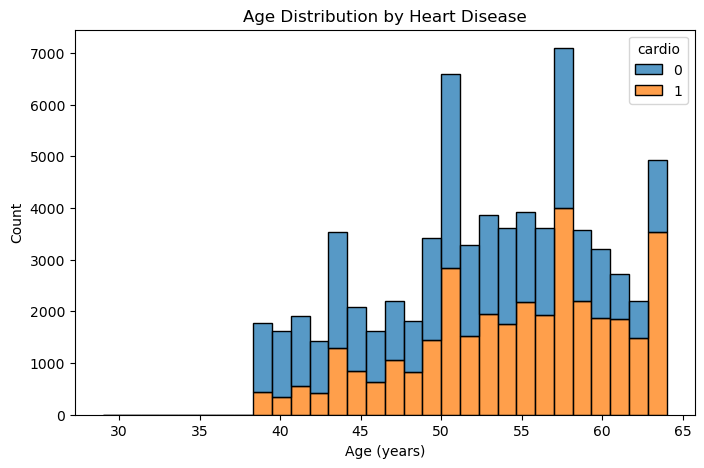

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.histplot(data=data, x='age_years', hue='cardio', multiple='stack', bins=30)
plt.title('Age Distribution by Heart Disease')
plt.xlabel('Age (years)')
plt.ylabel('Count')
plt.show()


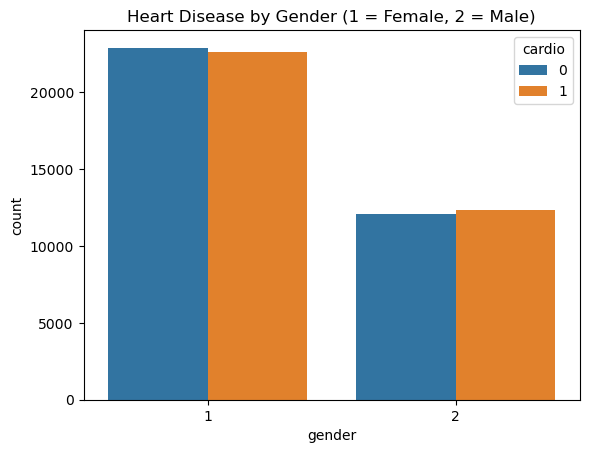

In [20]:
sns.countplot(data=data, x='gender', hue='cardio')
plt.title('Heart Disease by Gender (1 = Female, 2 = Male)')
plt.show()


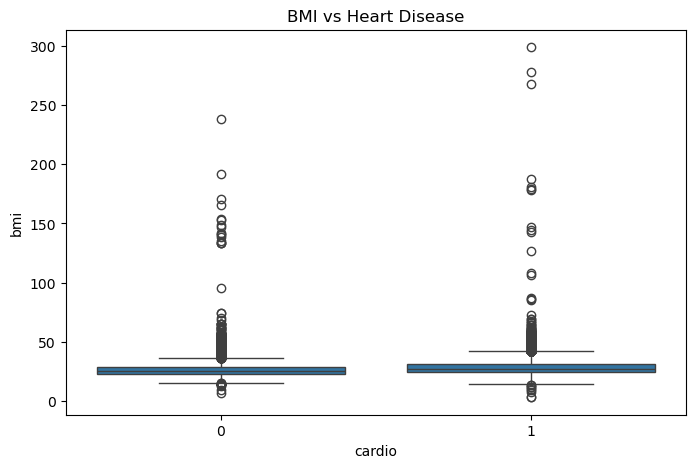

In [22]:
plt.figure(figsize=(8,5))
sns.boxplot(data=data, x='cardio', y='bmi')
plt.title('BMI vs Heart Disease')
plt.show()


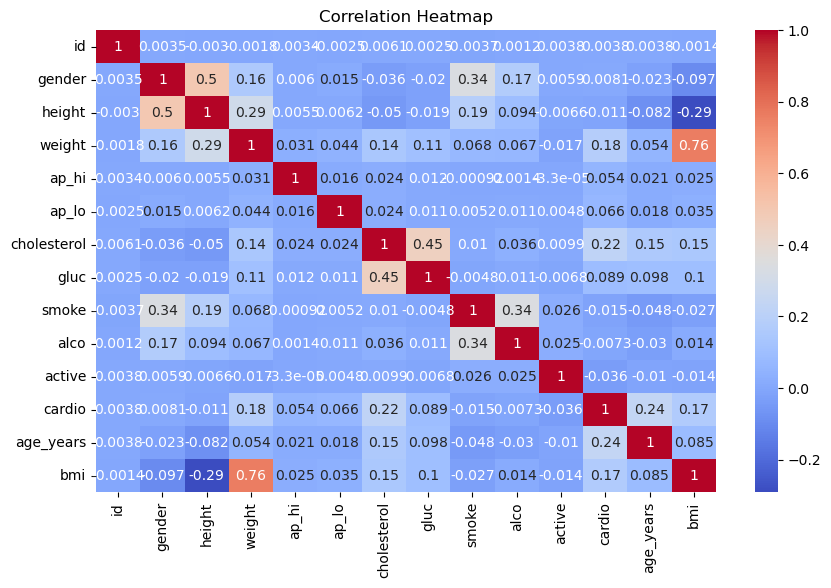

In [24]:
plt.figure(figsize=(10, 6))
corr_matrix = data.select_dtypes(include='number').corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


## 📌 Final Observations and Conclusion

1. **Target Distribution**  
   The dataset is relatively balanced between patients with and without cardiovascular disease, making it suitable for predictive modeling without heavy class imbalance concerns.

2. **Age and Heart Disease**  
   There is a strong trend showing that individuals aged 40 and above are more likely to develop heart disease. Age is a major contributing factor.

3. **Gender-Based Trends**  
   Males have a slightly higher rate of cardiovascular disease, but the difference is not substantial. Gender alone may not be a strong predictor.

4. **BMI and Heart Disease**  
   Individuals diagnosed with heart disease tend to have a higher BMI. This supports the known medical relationship between obesity and cardiovascular risk.

5. **Correlation Heatmap Analysis**  
   Features such as **blood pressure**, **cholesterol**, **glucose**, and **BMI** show meaningful correlations with heart disease and can be used effectively in predictive modeling.

6. **Lifestyle Factors**  
   Variables like smoking, alcohol consumption, and physical activity show weaker direct correlations but may have long-term impacts when combined with other health indicators.

---

### ✅ Final Thought
This project successfully identifies key factors contributing to cardiovascular disease and builds a foundation for future machine learning models. It highlights the importance of regular health checkups and maintaining healthy lifestyle habits to reduce heart disease risk.
